In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('commits.csv')

In [3]:
# Xử lý dữ liệu để có thể sử dụng cho mô hình
df['Commited Date'] = pd.to_datetime(df['Commited Date'])
df = df[(df['Commited Date'] >= '2023-01-01') & (df['Commited Date'] <= '2023-12-31')]  # Lọc dữ liệu từ 2023
monthly_commits = df.groupby(pd.Grouper(key='Commited Date', freq='ME')).size().reset_index(name='CommitCount')

In [4]:
# Chuẩn bị features và target
X = pd.to_numeric(monthly_commits['Commited Date']).values.reshape(-1, 1)  # Reshape để phù hợp với input của mô hình
y = monthly_commits['CommitCount'].values

In [5]:
# Chuẩn hóa dữ liệu để đưa về cùng scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# X_train sẽ là dữ liệu từ 1/2023 đến 12/2023, không cần phân chia tập train/test do không cần dự đoán từ 1/1/2024
# Điều này sẽ phù hợp với yêu cầu dự đoán từ 1/1/2024
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X, y)

SVR(C=100, gamma=0.1)

In [7]:
# Tạo dữ liệu đầu vào cho việc dự đoán từ 1/1/2024 trở đi
future_dates = pd.date_range(start='2024-01-01', end='2024-12-01', freq='ME')
X_future = pd.to_numeric(future_dates).values.reshape(-1, 1)
X_future = scaler.transform(X_future)

In [8]:
# Dự đoán sử dụng mô hình
y_pred = svr.predict(X_future)

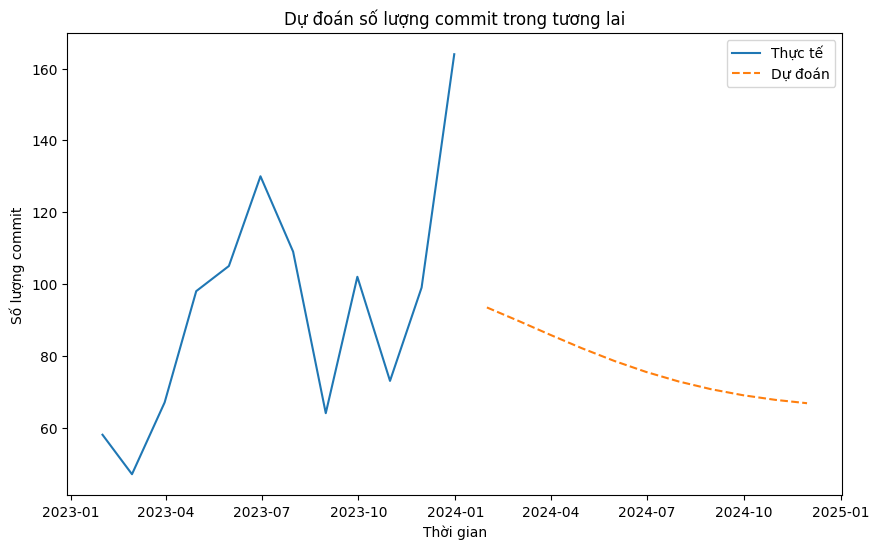

In [9]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(monthly_commits['Commited Date'], monthly_commits['CommitCount'], label='Thực tế')
plt.plot(future_dates, y_pred, label='Dự đoán', linestyle='dashed')
plt.title('Dự đoán số lượng commit trong tương lai')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng commit')
plt.legend()
plt.show()